# Hatree-Fock Method

## Molecular Schrodinger Equation 
$$H \Psi = E \Psi$$
$$
\left [ 
    - \sum_{i} \frac{\nabla_i^2}{2} 
    - \sum_{i} \frac{\nabla_A^2}{2} 
    - \sum_{A,i} \frac{Z^2}{r_{Ai}}
    + \sum_{A>B} \frac{Z_A Z_B}{R_{AB}}
    + \sum_{i>j} \frac{1}{r_{ij}}
\right ] \Psi(r;R) = E \Psi(r;R)
$$
$$
\left[ \hat{T}_e(r) + \hat{T}_N(r) + \hat{V}_{eN}(r;R) + \hat{V}_{NN}(R) + \hat{V}_{ee}(r) \right] \Psi(r;R) = E \Psi(r;R)
$$
#### <center> After Approximation </center>
$$
\left[ \hat{T}_e(r)  + \hat{V}_{eN}(r;R)  + \hat{V}_{ee}(r) \right] \Psi(r;R) = E \Psi(r;R)
$$

## Hatree-Fock Equation

$$\left ( \mathcal{H}^{Core} + \sum_i \left [ 2 \mathcal{J}_j - \mathcal{H}_j  \right ] \right ) \psi_i(r_i) = \sum_i \varepsilon_{ij} \psi_i(r_i) $$

$$ f_i \psi_i(r_i) = \sum_i \varepsilon_{ij} \psi_i(r_i) $$

<center> fi is the fock operator </center>

## Slatter Type Orbitals (SLA)

$$ \phi^{SLA} (r) = \left (\frac{\zeta^3}{\pi} \right )^{\frac{1}{2}} e^{-\zeta r}$$

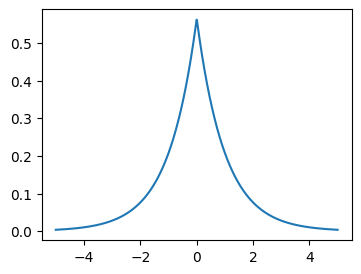

In [3]:
# Plotting Slatter Type Orbitals

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt 

x = np.linspace(-5,5,num=1000)
r = abs(x)
zeta = 1.0
psi_STO = (zeta**3/np.pi)**(0.5)*np.exp(-zeta*r)
plt.figure(figsize=(4,3))
plt.plot(x,psi_STO)

## Contracted Gaussian Function

$$\phi^{GF}(\alpha) = (2 \alpha / \pi)^{3/4} e^{-\alpha r}$$

$$\phi^{CGF}(r) = \sum_n d_n \phi^{GF}_n(\alpha)$$

$$\phi^{CGF}_{STO-3G}(r) = \sum_n^3 d_n \phi^{GF}_n(\alpha)$$

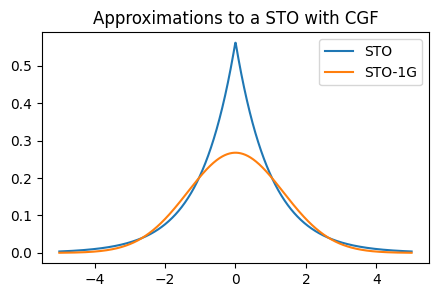

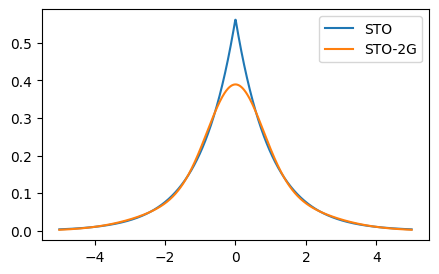

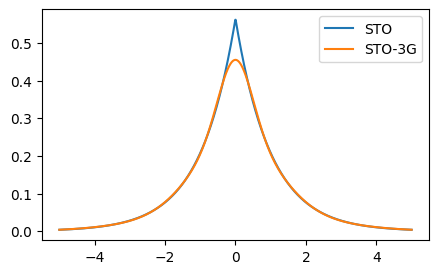

In [ ]:
# Coeff is the d_n variable in the equation above

Coeff = np.array([[1.00000,0.0000000,0.000000],
                  [0.678914,0.430129,0.000000],
                  [0.444635,0.535328,0.154329]])

# Expon is the alpha variable in the equation above
Expon = np.array([[0.270950,0.000000,0.000000],
                  [0.151623,0.851819,0.000000],
                  [0.109818,0.405771,2.227660]])

psi_CGF_STO1G = Coeff[0,0]*(2*Expon[0,0]/np.pi)**(0.75)*np.exp(-Expon[0,0]*r**2)
psi_CGF_STO2G = Coeff[1,0]*(2*Expon[1,0]/np.pi)**(0.75)*np.exp(-Expon[1,0]*r**2) \
            + Coeff[1,1]*(2*Expon[1,1]/np.pi)**(0.75)*np.exp(-Expon[1,1]*r**2) \
            + Coeff[1,2]*(2*Expon[1,2]/np.pi)**(0.75)*np.exp(-Expon[1,2]*r**2)
psi_CGF_STO3G = Coeff[2,0]*(2*Expon[2,0]/np.pi)**(0.75)*np.exp(-Expon[2,0]*r**2) \
            + Coeff[2,1]*(2*Expon[2,1]/np.pi)**(0.75)*np.exp(-Expon[2,1]*r**2) \
            + Coeff[2,2]*(2*Expon[2,2]/np.pi)**(0.75)*np.exp(-Expon[2,2]*r**2)

# Plot the three functions
plt.figure(figsize=(5,3))
plt.title("Approximations to a STO with CGF")
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO1G,label="STO-1G")
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO2G,label="STO-2G")
plt.legend()
plt.figure(figsize=(5,3))
plt.plot(x,psi_STO,label="STO")
plt.plot(x,psi_CGF_STO3G,label="STO-3G")
plt.legend()

## Integrals

### Overlap Integral

$$S(A,B,Rab2) = \left(\frac{\pi}{A+B}\right)^{3/2} e^{-\dfrac{A\ B \ Rab2}{A+B}}$$

In [ ]:
def S_int(A,B,Rab2):
    """
    Calculates the overlap between two gaussian functions
    """
    return (np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

### Kinetic Energy Integral (Electron)

$$ T(A,B,Rab2) = \left( \dfrac{A\ B}{A+B} \right) \left( \dfrac{3-2 A\ B\ Rab2}{A+B} \right) \left(\frac{\pi}{A+B}\right)^{3/2} e^{-\dfrac{A\ B \ Rab2}{A+B}}$$


In [ ]:
def T_int(A,B,Rab2):
    """
    Calculates the kinetic energy integrals for un-normalised primitives
    """
    return A*B/(A+B)*(3.0-2.0*A*B*Rab2/(A+B))*(np.pi/(A+B))**1.5*np.exp(-A*B*Rab2/(A+B))

### Potential Energy Integral (Electron-Neutron)

$$\frac{2}{3}$$

In [4]:
# Mathematical functions
def F0(t):
    """
    F function for 1s orbital
    """
    if (t<1e-6):
        return 1.0-t/3.0
    else:
        return 0.5*(np.pi/t)**0.5*sp.erf(t**0.5)
    
def erf(t):
    """
    Approximation for the error function
    """
    P = 0.3275911
    A = [0.254829592,-0.284496736,1.421413741,-1.453152027,1.061405429]
    
    T = 1.0/(1+P*t) 
    Tn=T

    Poly = A[0]*Tn
    for i in range(1,5):
        Tn=Tn*T
        Poly=Poly*A[i]*Tn

    return 1.0-Poly*np.exp(-t*t)

In [5]:
erf(0.4)

0.9786398678196121

In [ ]:
def V_int(A,B,Rab2,Rcp2,Zc):
    """
    Calculates the un-normalised nuclear attraction integrals
    """
    V = 2.0*np.pi/(A+B)*F0((A+B)*Rcp2)*np.exp(-A*B*Rab2/(A+B))
    return -V*Zc

In [15]:
x = [0.0012100485105976614, 0.0036758028129802167, 0.011166103012878157, 0.03391962595325368, 0.10303872563970547, 0.10303872563970547, 0.033919625953253665, 0.011166103012878148, 0.0036758028129802154, 0.0012100485105976614]

In [16]:
import  matplotlib.pyplot as plt

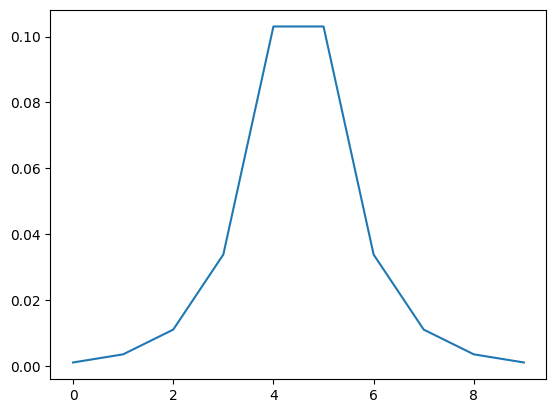

In [17]:
plt.plot(x)
plt.show()